In [2]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


# Nguồn tham khảo
https://github.com/ElzatY/aspect-based-sentiment-classification-model/blob/master/aspect_based_sentiment.ipynb


In [6]:

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

#Spacy
import spacy
nlp = spacy.load('en_core_web_sm')

# Other
import re
import json
import string
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

#Keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#load data
import pandas as pd
reviews_train = pd.read_csv("sampleDataset.csv").astype(str)

#show first 5 records
reviews_train.head()

,Unnamed: 0,Comment,Aspect,polarity
0,1,interesting concept grab quick bite,general,positive
1,2,small selection sandwich chip thing pop microwave,general,neutral
2,5,interesting concept chain convenience store op...,experience,positive
3,6,interesting concept chain convenience store op...,general,positive
4,8,found store partially customer able purchase p...,payment,neutral


In [8]:
#drop unnecessary columns
reviews_train = reviews_train.drop(['Unnamed: 0'], axis=1)

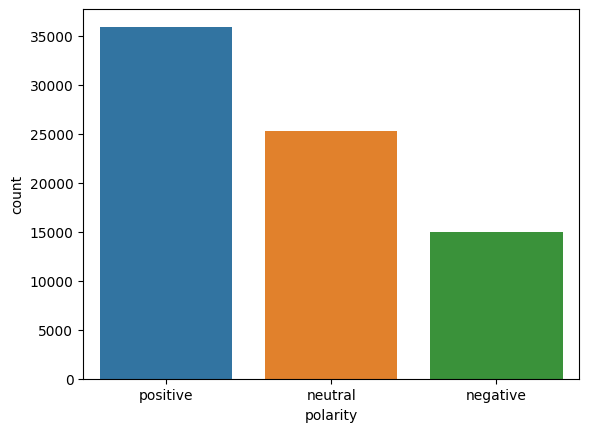

In [9]:
# plot the number of reviews per polarity
import matplotlib.pyplot as plt
import seaborn as sns
# create a countplot
sns.countplot(x='polarity', data=reviews_train)
# show the plot
plt.show()

In [10]:
#tokenize review text
vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(reviews_train.Comment)
reviews_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(reviews_train.Comment))

In [11]:
reviews_tokenized

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76255,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76256,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76257,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#encode aspect classes
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(reviews_train.Aspect)
encoded_aspect = to_categorical(integer_category)

In [13]:
# build a decision tree classifier for aspect classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_tokenized, encoded_aspect, test_size=0.2, random_state=42)

# build a decision tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# predict the labels on validation dataset
predictions = dtree.predict(X_test)

# Report the confusion matrix for multi-class classification
print(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)))

[[ 301   21   37    3    9    6    2  102    3]
 [ 484 2322  365   26  349   55   23   58  107]
 [ 672  387 3003   38   89  113   42   70   77]
 [ 177   46   40  244   58   46    3    2    5]
 [ 465  362   77   69  501  223   12  164   18]
 [ 402   45   96   41  154  737   12    7   33]
 [ 157   15   37    5   10   16  145    6    6]
 [ 376   62   98    4  163   10    5  359   45]
 [ 167  100   72   10   16   37    2   30  496]]


In [15]:
#print model accuracy
print("Accuracy:",accuracy_score(y_test, predictions))


Accuracy: 0.5226199842643587


In [16]:
# print classification results
predictions

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
# convert predictions to aspect classes
predictions_text = label_encoder.inverse_transform(predictions.argmax(axis=1))

In [18]:
predictions_text

array(['technology', 'general', 'privacy', ..., 'availability',
       'availability', 'payment'], dtype=object)

In [19]:
# function to predict aspect class for a given review
def predict_aspect(review):
    # remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove numbers
    review = re.sub(r'\d+', '', review)
    # remove stopwords
    review = ' '.join([word for word in review.split() if word not in (stopwords.words('english'))])
    # stemming
    stemmer = SnowballStemmer("english")
    review = ' '.join([stemmer.stem(word) for word in review.split()])
    # lowercase
    review = review.lower()
    # tokenize the review
    review_tokenized = tokenizer.texts_to_matrix([review])
    # predict the aspect class
    prediction = dtree.predict(review_tokenized)
    # convert the prediction to aspect class
    prediction_text = label_encoder.inverse_transform(prediction.argmax(axis=1))
    return prediction_text

In [20]:
# predict aspect class for a given review
predict_aspect("There will be less jobs in the future.")

array(['unemployment'], dtype=object)

In [21]:
#encode polarity classes
label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(reviews_train.polarity)
encoded_polarity = to_categorical(integer_category)


In [22]:
# build a decision tree classifier for polarity classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [23]:
#split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_tokenized, encoded_polarity, test_size=0.2, random_state=42)


In [24]:
# build a decision tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [25]:
#predict the labels on validation dataset
predictions = dtree.predict(X_test)
# Report the confusion matrix for multi-class classification
print(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)))

[[2742   61  215]
 [  45 4965   54]
 [ 165   49 6956]]


In [26]:
#print model accuracy
print("Accuracy:",accuracy_score(y_test, predictions))


Accuracy: 0.9613821138211383


In [27]:
# print classification results
predictions

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [29]:
# convert predictions to polarity classes
predictions_text = label_encoder.inverse_transform(predictions.argmax(axis=1))
predictions_text



array(['neutral', 'positive', 'negative', ..., 'positive', 'neutral',
       'positive'], dtype=object)

In [30]:
# function to predict polarity class for a given review
def predict_polarity(review):
    # remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove numbers
    review = re.sub(r'\d+', '', review)
    # remove stopwords
    review = ' '.join([word for word in review.split() if word not in (stopwords.words('english'))])
    # stemming
    stemmer = SnowballStemmer("english")
    review = ' '.join([stemmer.stem(word) for word in review.split()])
    # lowercase
    review = review.lower()
    # tokenize the review
    review_tokenized = tokenizer.texts_to_matrix([review])
    # predict the polarity class
    prediction = dtree.predict(review_tokenized)
    # convert the prediction to polarity class
    prediction_text = label_encoder.inverse_transform(prediction.argmax(axis=1))
    return prediction_text


In [31]:
# predict polarity class for a given review
predict_polarity("There will be less jobs in the future.")


array(['neutral'], dtype=object)

In [32]:
predict_polarity("interesting concept grab quick bite")


array(['positive'], dtype=object)

In [33]:
#K-fold cross validation
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score

# define 10-fold cross validation test harness
#kfold = KFold(n_splits=10, shuffle=True, random_state=42)
#cv_results = cross_val_score(dtree, reviews_tokenized, encoded_polarity, cv=kfold, scoring='accuracy')
#print(cv_results.mean())

# predict the labels on validation dataset
#predictions = cross_val_predict(dtree, reviews_tokenized, encoded_polarity, cv=kfold)

# Report the confusion matrix for multi-class classification
#print(confusion_matrix(encoded_polarity.argmax(axis=1), predictions.argmax(axis=1)))

#print model accuracy
#print("Accuracy:",accuracy_score(encoded_polarity, predictions))


